# Notebook final : générer la figure sup qui représente le réseau

Pour pouvoir utiliser sur plusieurs projets (rapport, présentation de labo et écriture de l'article) la même figure, elle est directement codée en Python

In [1]:
%matplotlib inline

/home/hugo/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


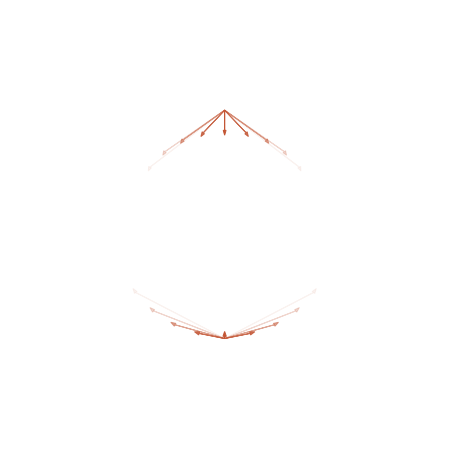

In [14]:
import matplotlib.patches as patches
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Arrow
from matplotlib.colors import hsv_to_rgb
from matplotlib.collections import PatchCollection

def envelope(th, theta, B_theta):
    if B_theta==np.inf:
        env = np.ones_like(th) 
    elif B_theta==0:
        env = np.zeros_like(th)
        env[np.argmin(th < theta)] = 1.
    else:
        env = np.exp((np.cos(2*(th-theta))-1)/4/B_theta**2)
    return env/env.max()      

patch_list = []
fig = plt.figure(figsize=(8, 8))

ax2 = fig.add_subplot(111, alpha=0.)
ax2.set_facecolor((1,1,1,0))
ax = fig.add_subplot(111, projection='polar', alpha=0.)
ax.set_facecolor((1,1,1,0))

opts= dict(ha='center', fontsize=14)
opts_small= dict(ha='center', fontsize=11)
N = 24
s = 42
theta = np.linspace(0, 2*np.pi, N+1, endpoint=True)

## connexions
N_arrow = 4 #number of connection arrows 
dthetas = alphas = np.linspace(-N_arrow, N_arrow, 2*N_arrow+1, endpoint=True)
dthetas *= 1.75*np.pi/N
alphas = np.exp( - alphas**2/ .4**2 / 2)

for dtheta, alpha in zip(dthetas, alphas): #extra-layers arrows
    #feedforward arrows
    plt.arrow(np.pi/2, 1.05, dtheta, -.185, color='r', alpha=alpha, head_width = .03)
    plt.arrow(np.pi/2, .75, dtheta, -.02, color='#71afc6', alpha=alpha, head_width = .03)
    #plt.arrow(np.pi, .82, dtheta, -.1, color='k', alpha=alpha, head_width = .03)
    #feedback arrows
    plt.arrow(0, .85, dtheta, .135, color='b', alpha=alpha, head_width = .03)
    plt.arrow(-np.pi/2, 1.05, dtheta, -.02, color='r', alpha=alpha, head_width = .03)
    

## neurones
'''colors = theta
for r, c in zip([1.2], ['#c35635']): #scattering neurons
    ax.plot(theta, r*np.ones_like(theta), c=c, alpha=.4) #ring drawing
    c = ax.scatter(theta[:-1], r*np.ones_like(theta[:-1]), c=c, s=s)'''
    


## entrée
N = 360
theta = np.linspace(0, 2*np.pi, N, endpoint=True)
#ax.fill_between(theta, 1.45, 1.45 + envelope(theta/2, np.pi/4, np.pi/24)/2.5, lw=0, color='g', alpha=.3)
#ax.fill_between(theta, .4, .38 + envelope(theta/2, np.pi/4, np.pi/26)/-3.5, lw=0, color='g', alpha=.6)

ax.set_ylim((0, 2))


'''ax.text(np.pi/2, 1.50, 'Entrée\n orientée bruitée', **opts_small)
ax.text(np.pi+.05, 1.6, 'Neurones\nExcitateurs', color = 'r', **opts)
ax.text(np.pi+.25, .25, 'Neurones\nInhibiteurs',color = 'b', **opts)'''

# Polar barplot
#N = 128
#theta = np.linspace(np.pi/3, 2*np.pi/3, N)
#radius = envelope(theta, np.pi/2, np.pi/16)/3
#rands = np.random.normal(.15, .1, N)/4

# using np.random.vonmises
'''N, N_samples = 128, 256
theta = np.linspace(np.pi/4, 3*np.pi/4, N)
#theta = np.linspace(0, np.pi, N)
B_theta = np.pi/30
mu, kappa = 0.0, 1/4.0/B_theta**2 # mean and dispersion
s = np.random.vonmises(np.pi/2, kappa, 1000)
print('min', s.min(), s.max())
hist, bins = np.histogram(s, bins=theta, normed=True)
hist /= hist.max()'

#width = theta[1] - theta[0]
bars = ax.bar(theta[:-1], hist/3, width=theta[1] - theta[0], bottom=1.15, color = 'g', alpha = .4)'''
#for i, t in enumerate(theta) :
#    bars = ax.bar(t, radius[i]+np.abs(np.sin(20*t)/5)+rands[i], width=width, bottom=1.45, color = 'g', alpha = .4)
    #bars = ax.bar(t, radius[i]*np.sin(t), width=width, bottom=1.45, color = 'g', alpha = .3)

for ax_ in [ax, ax2]:
    ax_.grid(False, axis='both')

    ax_.set_xticks([])
    ax_.set_yticks([])
    ax_.set_axis_off()

#ax.add_collection(PatchCollection(patch_list))
#fig.subplots_adjust(hspace = .0, wspace = .0, left=0.01, bottom=0.01, right=.99, top=.99)
plt.show()
fig.savefig('./4_lat.svg', format='svg', transparent = True, bbox_inches = 'tight')